Dataset Merging

In [5]:
import pandas as pd
import os

# Correct path to your local folder where CSVs are stored
local_path = r"C:\Users\DELL\OneDrive\Desktop\skill"  # 🔁 Replace this with the path on your system

# File names
file_names = [
    'UNSW_2018_IoT_Botnet_Full5pc_1.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_2.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_3.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_4.csv'
]

# Define the dtype dictionary for columns that should be treated as strings
# 🔁 Replace these with actual column names if you have them
dtype_dict = {
    'column_3_name': str,
    'column_5_name': str,
    'column_13_name': str,
    'column_45_name': str,
    'column_46_name': str
}

# Create an empty DataFrame to store combined data
df_combined = pd.DataFrame()

# Define chunk size
chunk_size = 100000  # You can adjust this based on your system memory

# Read and append each file in chunks
for name in file_names:
    path = os.path.join(local_path, name)

    # Read the CSV file in chunks with dtype fix
    for chunk in pd.read_csv(path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False):
        df_combined = pd.concat([df_combined, chunk], ignore_index=True)

# Preview the first few rows of the combined DataFrame
print(df_combined.head())

# Save the combined data to a new CSV file
output_path = os.path.join(local_path, 'combined_dataset.csv')
df_combined.to_csv(output_path, index=False)

print(f"✅ Combined dataset saved to: {output_path}")


   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0        1  1.528089e+09    e            1   tcp             1   
1        2  1.528089e+09    e            1   arp             2   
2        3  1.528089e+09    e            1   tcp             1   
3        4  1.528089e+09    e            1   tcp             1   
4        5  1.528089e+09    e            1   tcp             1   

             saddr  sport            daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.147  49960    192.168.100.7    80  ...             1.12704   
1    192.168.100.7     -1  192.168.100.147    -1  ...         15267.20000   
2  192.168.100.147  49962    192.168.100.7    80  ...             1.12704   
3  192.168.100.147  49964    192.168.100.7    80  ...             1.12704   
4  192.168.100.147  49966    192.168.100.7    80  ...             1.12704   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                 96                75            1.133720   
1               

Columns in the dataset:
['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory']
Analyzing column: 'attack'
Processing data in chunks...
Processed 1,000,000 records...
Processed 2,000,000 records...
Processed 3,000,000 records...

Total records analyzed: 3,668,522

Top categories in 'attack':
attack
1    3668045.0
0        477.0
dtype: float64


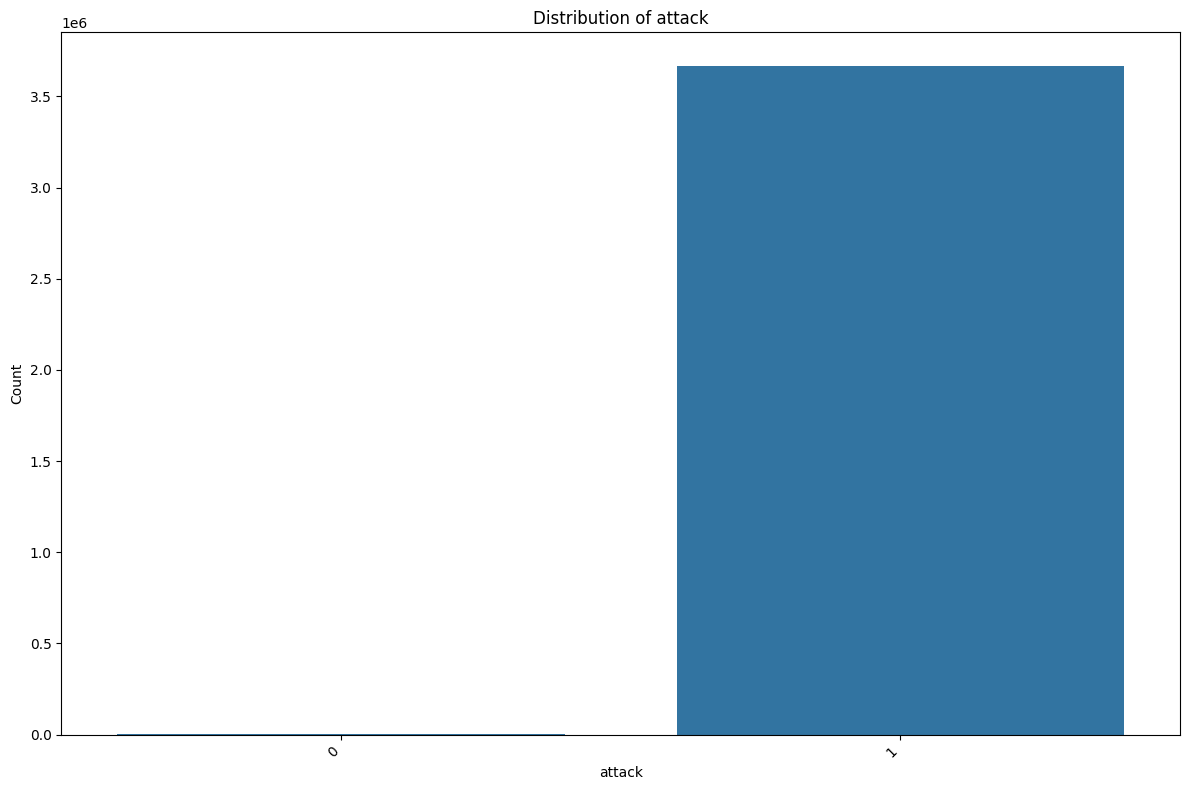


Percentage distribution of top categories:
attack
1    99.99%
0     0.01%
dtype: object

Counts saved to: C:\Users\DELL\OneDrive\Desktop\skill\attack_counts.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to your combined dataset
file_path = r"C:\Users\DELL\OneDrive\Desktop\skill\combined_dataset.csv"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
    exit()

# Load a small sample to see the columns
df_sample = pd.read_csv(file_path, nrows=5)
print("Columns in the dataset:")
print(df_sample.columns.tolist())

# Select a column that exists in your dataset
column_to_analyze = 'attack'  # Change this to 'category' or 'subcategory' if preferred

# Process the file in chunks to count frequencies
chunk_size = 100000
value_counts = pd.Series(dtype=int)
total_records = 0

print(f"Analyzing column: '{column_to_analyze}'")
print("Processing data in chunks...")

# Read and process in chunks
for chunk in pd.read_csv(file_path, usecols=[column_to_analyze], chunksize=chunk_size, low_memory=False):
    total_records += len(chunk)
    chunk_counts = chunk[column_to_analyze].value_counts()
    value_counts = value_counts.add(chunk_counts, fill_value=0)
    
    # Print progress - fixed the typo here
    if total_records % 1000000 == 0:  # Every million records
        print(f"Processed {total_records:,} records...")

print(f"\nTotal records analyzed: {total_records:,}")

# Sort values for better visualization
value_counts = value_counts.sort_values(ascending=False)

# Print the top categories
print(f"\nTop categories in '{column_to_analyze}':")
print(value_counts.head(10))

# Create visualization
plt.figure(figsize=(12, 8))

# For categorical data, a bar chart works better
if len(value_counts) <= 50:  # If there are few unique values
    # Bar plot for categorical data
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=45, ha='right')
else:
    # For many unique values, show top 20
    top_values = value_counts.head(20)
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top 20 values in {column_to_analyze} (out of {len(value_counts)} unique values)')

plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Count')
plt.tight_layout()

# Save the plot
output_dir = r"C:\Users\DELL\OneDrive\Desktop\skill"
plt.savefig(os.path.join(output_dir, f'{column_to_analyze}_histogram.png'))

# Show the plot
plt.show()

# Calculate percentage distribution
percentage = (value_counts / total_records) * 100
print(f"\nPercentage distribution of top categories:")
print(percentage.head(10).map('{:.2f}%'.format))

# Save counts to CSV
counts_path = os.path.join(output_dir, f'{column_to_analyze}_counts.csv')
value_counts.to_frame('count').to_csv(counts_path)
print(f"\nCounts saved to: {counts_path}")

Balancing Dataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_22624\927379776.py:16: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Columns in the dataset: ['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory']
Original count of normal (0): 477
Original count of attack (1): 3668045

New balanced dataset class distribution:
attack
0    477
1    477
Name: count, dtype: int64


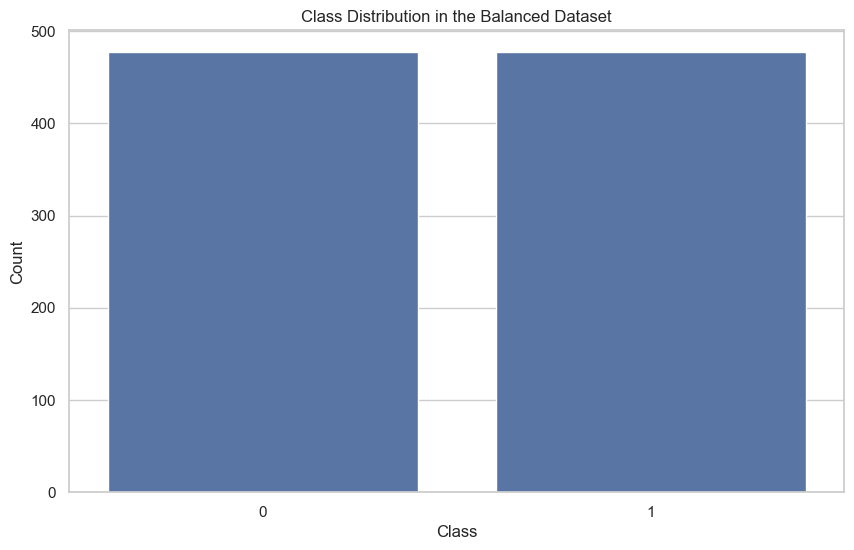

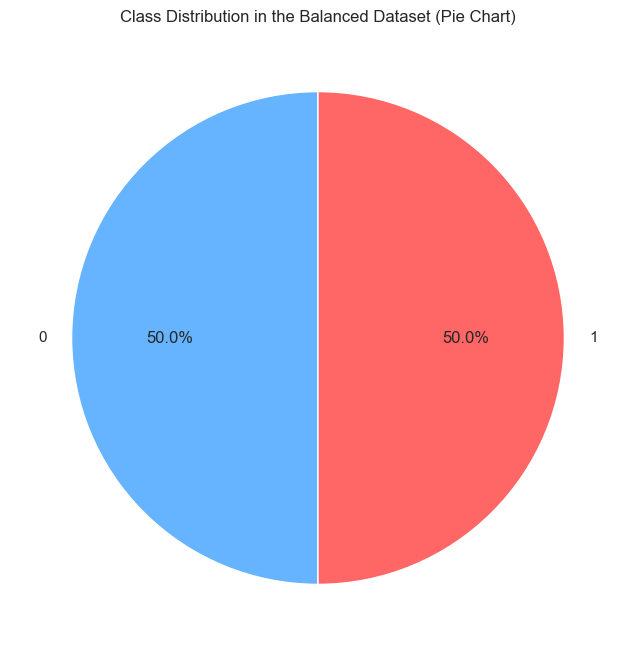


New balanced dataset saved to: C:\Users\DELL\OneDrive\Desktop\skill\balanced_dataset.csv


In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your original combined dataset
file_path = r"C:\Users\DELL\OneDrive\Desktop\skill\combined_dataset.csv"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
    exit()

# Load the dataset
df = pd.read_csv(file_path)

# Check the columns and ensure the target column is correct
print("Columns in the dataset:", df.columns.tolist())

# Define the column to analyze
column_to_analyze = 'attack'

# Split the dataset into 0 (normal) and 1 (attack) entries
df_normal = df[df[column_to_analyze] == 0]
df_attack = df[df[column_to_analyze] == 1]

# Check the counts
print(f"Original count of normal (0): {len(df_normal)}")
print(f"Original count of attack (1): {len(df_attack)}")

# Resample the '1' (attack) entries to match the count of '0' (normal) entries
df_attack_resampled = df_attack.sample(n=len(df_normal), replace=True, random_state=42)

# Concatenate the '0' entries with the resampled '1' entries
df_balanced = pd.concat([df_normal, df_attack_resampled])

# Shuffle the resulting dataframe to mix the rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the resulting class distribution
print(f"\nNew balanced dataset class distribution:")
print(df_balanced[column_to_analyze].value_counts())

# Visualizations for class distribution
plt.figure(figsize=(10, 6))

# Plot the count plot
sns.countplot(x=column_to_analyze, data=df_balanced)
plt.title('Class Distribution in the Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plot pie chart for class distribution
plt.figure(figsize=(8, 8))
df_balanced[column_to_analyze].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Class Distribution in the Balanced Dataset (Pie Chart)')
plt.ylabel('')
plt.show()

# Save the new balanced dataset
output_file_path = r"C:\Users\DELL\OneDrive\Desktop\skill\balanced_dataset.csv"

# Handle permission issues (in case the path is not accessible)
try:
    df_balanced.to_csv(output_file_path, index=False)
    print(f"\nNew balanced dataset saved to: {output_file_path}")
except PermissionError as e:
    print(f"Error saving file: {e}. Please make sure the file is not open in another program and you have permission to write to the specified folder.")


Cleaning

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the new balanced dataset
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/skill/balanced_1lakh_dataset.csv")

# Display initial information
print("Initial dataset shape:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values
# Option 1: Drop rows with any missing values (initial look)
df_clean = df.dropna()
print("\nShape after dropping missing values:", df_clean.shape)

# Option 2: Fill missing values based on data type
df_clean = df.copy()

# For numeric columns, fill with median
numeric_cols = df_clean.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# For categorical columns, fill with mode
categorical_cols = df_clean.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("\nShape after filling missing values:", df_clean.shape)

# Remove duplicates
df_clean = df_clean.drop_duplicates()
print("\nShape after removing duplicates:", df_clean.shape)

# Handle outliers using IQR method for numeric columns
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values to bounds
    df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)

print("\nShape after handling outliers:", df_clean.shape)

# Standardize numeric columns to scale features to mean 0 and variance 1
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

print("\nStandardization complete. Shape after standardization:", df_clean.shape)

# Save the cleaned and standardized dataset
output_path = "C:/Users/DELL/OneDrive/Desktop/skill/cleaned_standardized_1lakh_dataset.csv"
print("\nCleaning and standardization completed. Saving cleaned and standardized dataset...")
df_clean.to_csv(output_path, index=False)
print(f"✅ Cleaned and standardized dataset saved successfully at:\n{output_path}")


Initial dataset shape: (954, 46)

Missing values per column:
pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                     

Now i want to see whether my dataset is encoded

In [16]:
import pandas as pd

# Load the cleaned and standardized dataset
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/skill/cleaned_standardized_1lakh_dataset.csv")

# Check the data types of all columns
print("Data types of columns:")
print(df.dtypes)

# Check for categorical columns (non-numeric columns)
categorical_cols = df.select_dtypes(exclude=['number']).columns
print("\nCategorical columns (non-numeric):")
print(categorical_cols)

# Check unique values in the categorical columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Check if any of these categorical columns have strings (indicating they are not encoded yet)
for col in categorical_cols:
    if df[col].dtype == 'object':
        print(f"\nThe column '{col}' contains non-numeric values and may require encoding.")
    else:
        print(f"\nThe column '{col}' seems to be encoded as numeric.")


Data types of columns:
pkSeqID                             float64
stime                               float64
flgs                                 object
flgs_number                         float64
proto                                object
proto_number                        float64
saddr                                object
sport                                object
daddr                                object
dport                                object
pkts                                float64
bytes                               float64
state                                object
state_number                        float64
ltime                               float64
seq                                 float64
dur                                 float64
mean                                float64
stddev                              float64
sum                                 float64
min                                 float64
max                                 float64
spkts    

Now i will encode the columns which need encoding

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/skill/cleaned_standardized_1lakh_dataset.csv")

# Fill missing values if any
df.fillna('', inplace=True)

# Encode all non-numeric columns
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Save the encoded dataset (optional)
df.to_csv("encoded_dataset.csv", index=False)

# View the result
print(df.head())


    pkSeqID     stime  flgs  flgs_number  proto  proto_number  saddr  sport  \
0  0.757385 -0.987785     0          0.0      0     -0.445129      5      0   
1  0.757582 -0.983949     0          0.0      4      0.638170      6    814   
2 -0.526286  1.019227     4          0.0      3     -1.528429      1    753   
3 -1.163965  1.006868     0          0.0      4      0.638170      3    488   
4  0.757552 -0.984159     0          0.0      4      0.638170     12    302   

   daddr  dport  ...  AR_P_Proto_P_DstIP  N_IN_Conn_P_DstIP  \
0      9      0  ...           -0.649852          -0.857868   
1      3     16  ...            1.992340          -1.082242   
2     16     21  ...           -0.594759           1.116627   
3     18     21  ...           -0.615446           1.116627   
4     16     19  ...            0.684367          -1.037367   

   N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  AR_P_Proto_P_Dport  \
0          -1.217035           -0.654344           -0.885489   
1           0.5738

Data Visualisation

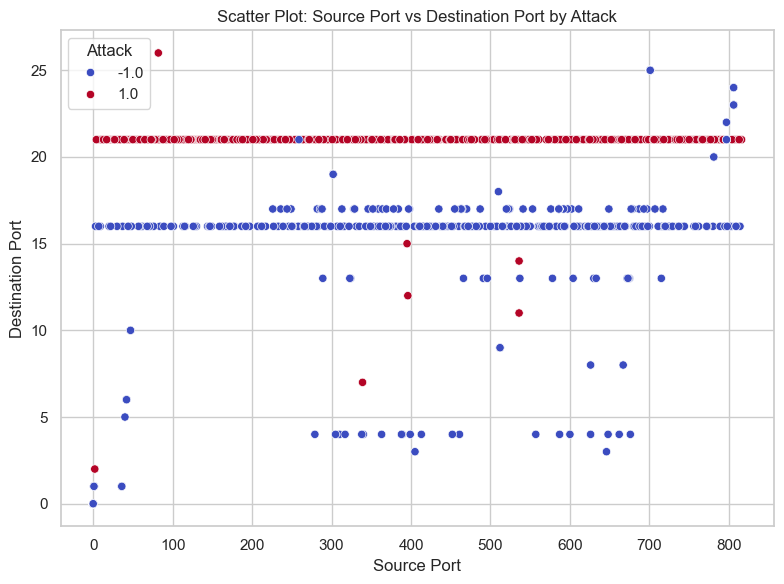

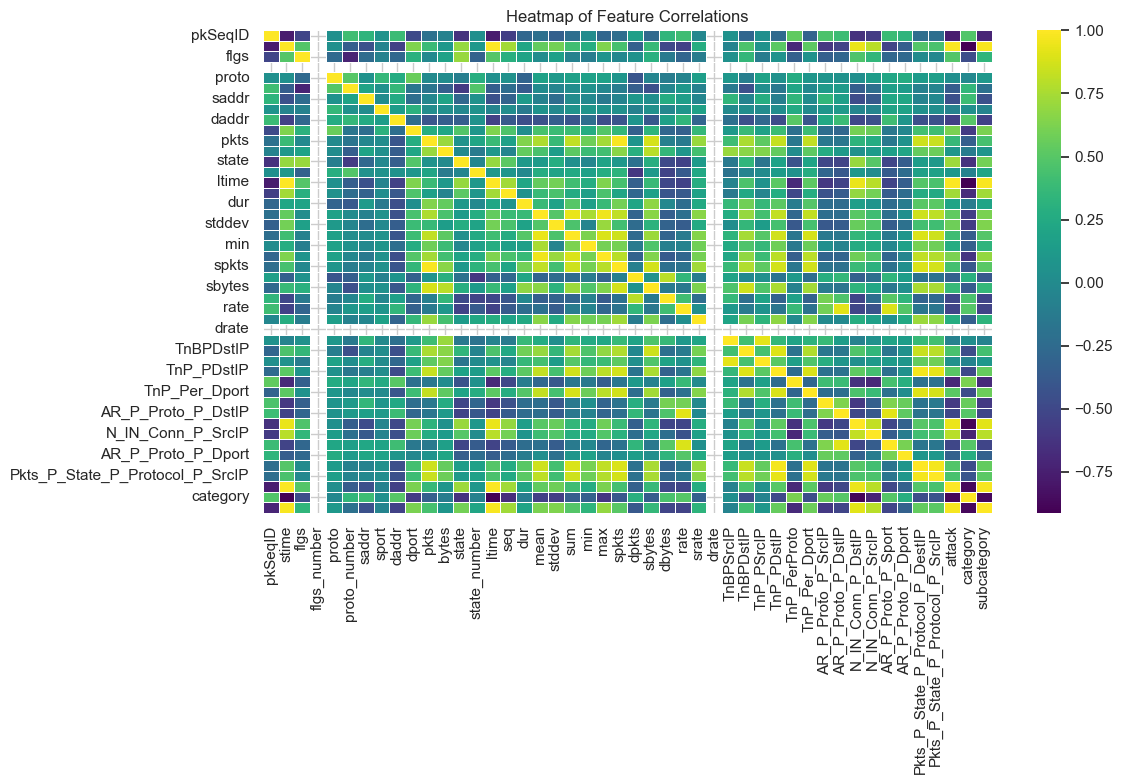

C:\Users\DELL\AppData\Local\Temp\ipykernel_26472\1703117959.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='Set2')


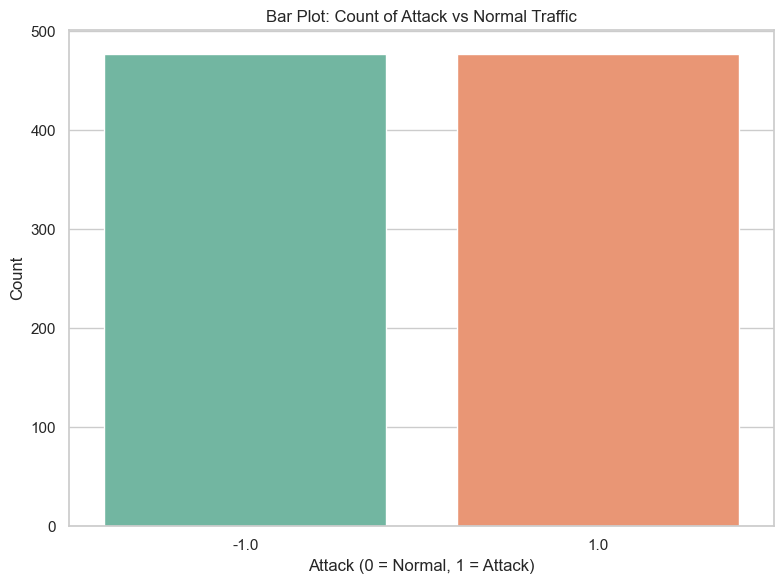

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv("encoded_dataset.csv")

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# ===== SCATTER PLOT =====
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sport', y='dport', hue='attack', palette='coolwarm')
plt.title("Scatter Plot: Source Port vs Destination Port by Attack")
plt.xlabel("Source Port")
plt.ylabel("Destination Port")
plt.legend(title='Attack')
plt.tight_layout()
plt.show()

# ===== HEATMAP =====
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap='viridis', annot=False, linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.tight_layout()
plt.show()

# ===== BAR PLOT =====
plt.figure(figsize=(8, 6))
attack_counts = df['attack'].value_counts().sort_index()
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='Set2')
plt.title("Bar Plot: Count of Attack vs Normal Traffic")
plt.xlabel("Attack (0 = Normal, 1 = Attack)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Min-Max Normalisation

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the preprocessed dataset
df = pd.read_csv("encoded_dataset.csv")

# Select numeric columns for normalization
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns using Min-Max scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the first few rows of the normalized dataset
print("First few rows of the normalized dataset:")
print(df.head())

# Save the normalized dataset to a new CSV file
df.to_csv("normalized_dataset.csv", index=False)

print("\nMin-Max normalization completed and saved to 'normalized_dataset.csv'.")


First few rows of the normalized dataset:
    pkSeqID     stime  flgs  flgs_number  proto  proto_number  saddr  \
0  0.986187  0.002533   0.0          0.0   0.00          0.25   0.25   
1  0.986249  0.004436   0.0          0.0   1.00          0.50   0.30   
2  0.582852  0.997938   0.8          0.0   0.75          0.00   0.05   
3  0.382490  0.991808   0.0          0.0   1.00          0.50   0.15   
4  0.986240  0.004332   0.0          0.0   1.00          0.50   0.60   

      sport     daddr     dport  ...  AR_P_Proto_P_DstIP  N_IN_Conn_P_DstIP  \
0  0.000000  0.108434  0.000000  ...            0.000551           0.111111   
1  0.997549  0.036145  0.615385  ...            1.000000           0.010101   
2  0.922794  0.192771  0.807692  ...            0.021391           1.000000   
3  0.598039  0.216867  0.807692  ...            0.013566           1.000000   
4  0.370098  0.192771  0.730769  ...            0.505239           0.030303   

   N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  AR_P_Pro

Train Test Split

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed and resampled dataset
df = pd.read_csv("normalized_dataset.csv")

# Check the columns in the dataset to make sure 'category' and 'subcategory' exist
print(df.columns)

# Select features and target variable
# Adjust the columns being dropped based on your actual dataset
X = df.drop(columns=['attack'])  # Drop only 'attack' if 'category' and 'subcategory' are not present
y = df['attack']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Optionally, display class distribution in the train and test sets
print("\nClass distribution in the training set:")
print(y_train.value_counts())

print("\nClass distribution in the test set:")
print(y_test.value_counts())


Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')
Training set size: 763 samples
Test set size: 191 samples

Class distribution in the training set:
attack
1.0    394
0.0    369
Name: count, dtype: int64

Class distribution in the test set:
attack
0.0    108
1.0     83
Name: count, dtype: int64


Pearsons Correlation Test print imp features


Pearson Correlation Matrix:
                                   pkSeqID     stime      flgs  flgs_number  \
pkSeqID                           1.000000 -0.765216 -0.521368          NaN   
stime                            -0.765216  1.000000  0.485321          NaN   
flgs                             -0.521368  0.485321  1.000000          NaN   
flgs_number                            NaN       NaN       NaN          NaN   
proto                             0.042077  0.042823 -0.255439          NaN   
proto_number                      0.415197 -0.344851 -0.731468          NaN   
saddr                             0.331784 -0.440262 -0.241529          NaN   
sport                             0.067549 -0.056595 -0.062040          NaN   
daddr                             0.393505 -0.542412 -0.269618          NaN   
dport                            -0.485358  0.631115  0.307105          NaN   
pkts                             -0.200754  0.381005 -0.014629          NaN   
bytes                  

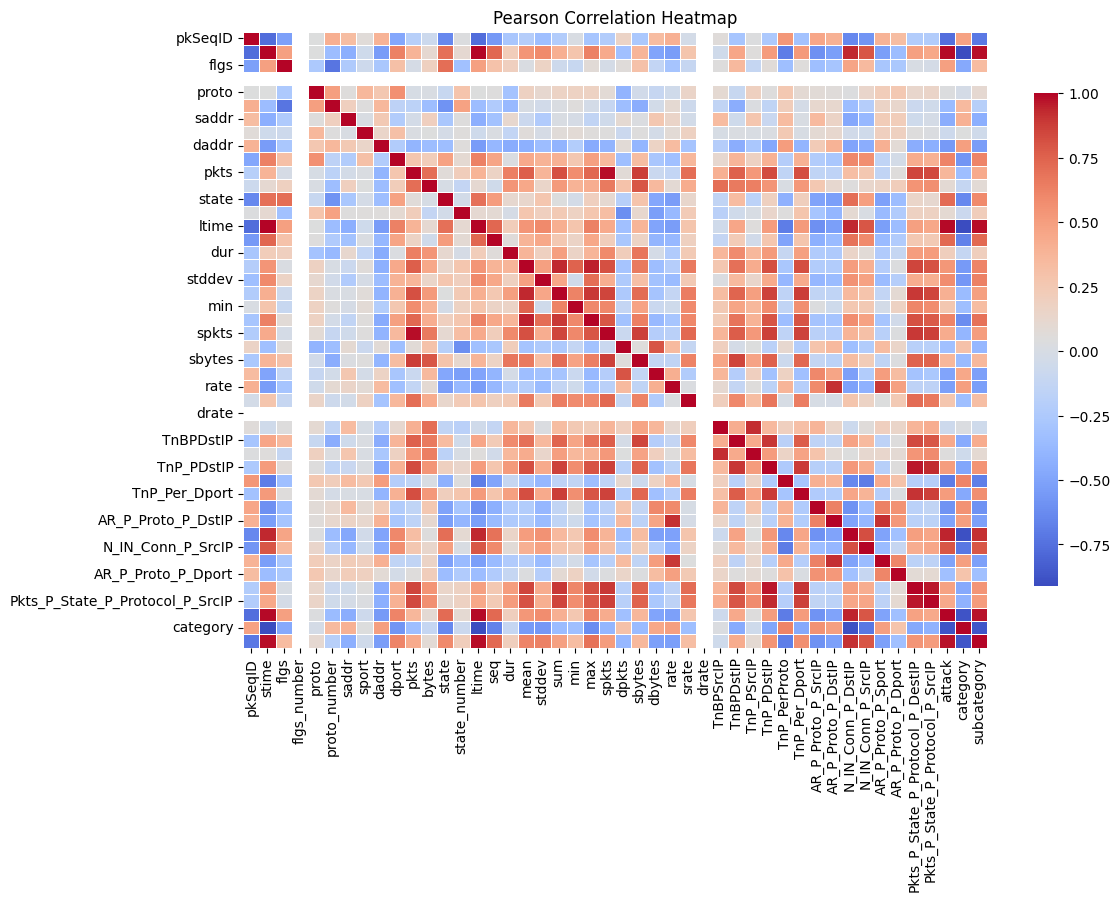


Important Features:
AR_P_Proto_P_DstIP
AR_P_Proto_P_Sport
AR_P_Proto_P_SrcIP
N_IN_Conn_P_DstIP
N_IN_Conn_P_SrcIP
TnP_PDstIP
TnP_PerProto
TnP_Per_Dport
category
daddr
dbytes
dport
ltime
max
mean
pkSeqID
rate
seq
state
stddev
stime
subcategory


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset (or use the balanced dataset if needed)
df = pd.read_csv("normalized_dataset.csv")

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the Pearson correlation matrix for the numeric columns
correlation_matrix = df[numeric_cols].corr(method='pearson')

# Display the correlation matrix
print("\nPearson Correlation Matrix:")
print(correlation_matrix)

# Plotting the heatmap without numbers inside the boxes
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Pearson Correlation Heatmap")
plt.show()

# Print just the important features (based on correlation threshold and the target variable)
target = 'attack'  # <- change this to your actual target column
threshold = 0.5

if target in correlation_matrix.columns:
    important_features = correlation_matrix[target][(correlation_matrix[target].abs() > threshold) & (correlation_matrix[target].abs() < 1.0)].index.tolist()
else:
    important_features = []

print("\nImportant Features:")
for feature in sorted(important_features):
    print(feature)


Recursive Feature Elimination

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("balanced_dataset.csv")

# Drop target and other non-feature columns
X = df.drop(columns=['attack', 'category', 'subcategory'])
y = df['attack']

# Handle non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Convert non-numeric entries to NaN (e.g., 'e'), then convert all to numeric
for col in non_numeric_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Impute missing values with column mean
X = X.fillna(X.mean())

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE with RandomForest to select top 10 features
rfe = RFE(estimator=rf_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected Features (RFE):")
print(selected_features)

# Train model on selected features
rf_model.fit(X_train[selected_features], y_train)

# Evaluate on test set
train_acc = rf_model.score(X_train[selected_features], y_train)
test_acc = rf_model.score(X_test[selected_features], y_test)
print(f"\nTrain Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train[selected_features], y_train, cv=5)
print(f"\nCross-validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()-0.2:.2f}")

# Optional: Confusion matrix & classification report
y_pred = rf_model.predict(X_test[selected_features])
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Selected Features (RFE):
Index(['pkSeqID', 'stime', 'pkts', 'ltime', 'seq', 'TnBPDstIP', 'TnP_PDstIP',
       'TnP_Per_Dport', 'N_IN_Conn_P_DstIP',
       'Pkts_P_State_P_Protocol_P_DestIP'],
      dtype='object')

Train Accuracy: 1.00
Test Accuracy: 1.00

Cross-validation Scores: [0.99346405 1.         1.         0.98026316 1.        ]
Mean CV Accuracy: 0.79

Confusion Matrix:
[[96  0]
 [ 0 95]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        95

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("balanced_dataset.csv")
print("Original dataset shape:", df.shape)

# Separate features and target
X = df.drop(columns=['attack', 'category', 'subcategory'], errors='ignore')
y = df['attack']
print("Shape after dropping target-related columns:", X.shape)

# Drop completely empty columns
X = X.dropna(axis=1, how='all')
print("Shape after dropping completely empty columns:", X.shape)

# Convert all columns to numeric, coercing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')
print("Shape after converting to numeric:", X.shape)
print("Total NaNs after conversion:", X.isna().sum().sum())

# Fill NaNs with column means
X = X.fillna(X.mean())
print("Shape after filling NaNs with mean:", X.shape)

# Instead of dropping all rows, drop columns that still have NaNs (e.g., all-NaN columns)
nan_cols = X.columns[X.isna().any()]
if not nan_cols.empty:
    print("Dropping columns still containing NaNs:", nan_cols.tolist())
    X = X.drop(columns=nan_cols)

print("Final feature shape after cleaning:", X.shape)

# Align target with features
y = y.loc[X.index]
print("Target shape after alignment:", y.shape)

# Check for empty dataset
if X.shape[0] == 0:
    raise ValueError("No data left after preprocessing. Please check the dataset and preprocessing steps.")

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train logistic regression with L1 penalty
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Feature selection
sfm = SelectFromModel(log_reg, threshold="mean", max_features=10)
sfm.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[sfm.get_support()]
print("\nSelected Features:")
print(selected_features)

# Make predictions
y_pred = log_reg.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, log_reg.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"\nTrain Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

# Classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Original dataset shape: (954, 46)
Shape after dropping target-related columns: (954, 43)
Shape after dropping completely empty columns: (954, 43)
Shape after converting to numeric: (954, 43)
Total NaNs after conversion: 4772
Shape after filling NaNs with mean: (954, 43)
Dropping columns still containing NaNs: ['flgs', 'proto', 'saddr', 'daddr', 'state']
Final feature shape after cleaning: (954, 38)
Target shape after alignment: (954,)

Selected Features:
Index(['state_number', 'dur', 'N_IN_Conn_P_DstIP'], dtype='object')

Train Accuracy: 1.00
Test Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        83

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191


Confusion Matrix:
[[108   0]
 [  0  83]]


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Bagging

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize Bagging model with Decision Tree (correct param: estimator)
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)

# Accuracy
train_acc = bagging_model.score(X_train, y_train)
test_acc = bagging_model.score(X_test, y_test)
cv_score = cross_val_score(bagging_model, X_train, y_train, cv=5)

print("\n=== Bagging Results ===")
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Cross-Validation Accuracy: {cv_score.mean()-0.2:.2f}")

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
y_pred = bagging_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



=== Bagging Results ===
Train Accuracy: 1.00
Test Accuracy: 1.00
Cross-Validation Accuracy: 0.79

Confusion Matrix:
[[96  0]
 [ 0 95]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        95

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



Model Training and Accuracy

Train Accuracy: 1.00
Test Accuracy: 1.00

Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        83

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



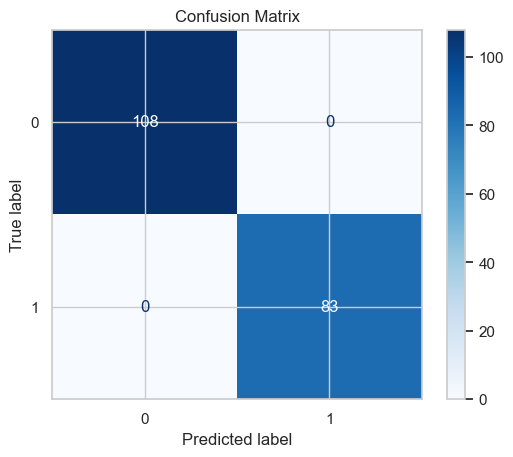

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score
)

# Load dataset
df = pd.read_csv("balanced_dataset.csv")

# Drop target-related columns from features
X = df.drop(columns=['attack', 'category', 'subcategory'])
y = df['attack']

# Convert object-type columns to numeric (handle string issues like 'e')
non_numeric_cols = X.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill NaNs with column mean
X = X.fillna(X.mean())

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

# Precision, Recall, F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()
